## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

# ON EDITING

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement

We want to predict the C02 Emission produced by cars. We have many variables from the car age, the brand, the engine size, etc. In modelling we want to try to practice with simple linear regression and multiple linear regression

<a name='1.2'></a>
## 1.2 Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<a name='1.3'></a>
## 1.3 Read or Import

In [3]:
df = pd.read_csv("FuelConsumption.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [4]:
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 8 numerical features:
 ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [7]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 5 categorical features:
 ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


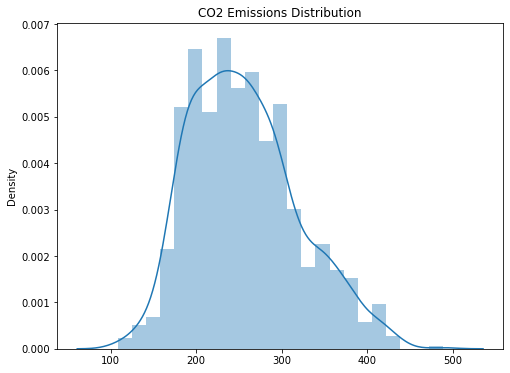

In [101]:
plt.figure(figsize=(8,6))
sns.distplot(df[['CO2EMISSIONS']])
title = plt.title("CO2 Emissions Distribution")

## 2.2 Features Correlation with Target

In [102]:
# Top 10 highest pearson correlation
corr_mat = df.corr().CO2EMISSIONS.sort_values(ascending=False)
corr_mat.head(8)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

In [103]:
numCols

['MODELYEAR',
 'ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

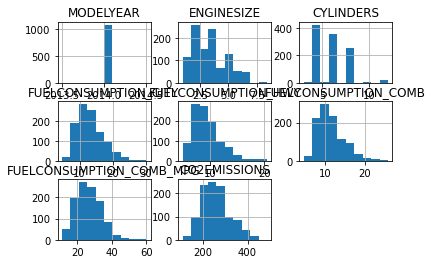

In [104]:
numCols2.hist()
plt.show()

In [105]:
type(numCols2)

pandas.core.frame.DataFrame

In [106]:
numCols2 = df.select_dtypes(exclude='object')


In [107]:
numCols2

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


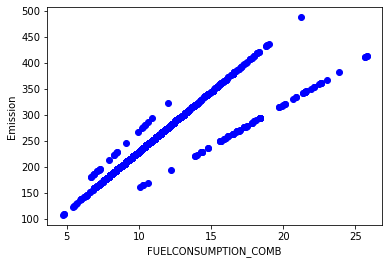

In [108]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

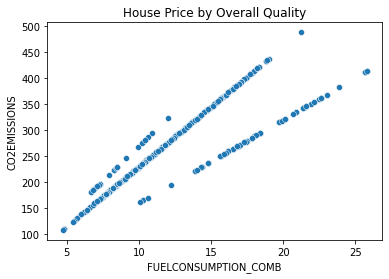

In [109]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS')
title = plt.title('House Price by Overall Quality')

<a name='1.5'></a>
## 1.5 Data Preparation

In [14]:
#80/20 split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#FOR ENGINESIZE VS CO2EMISSIONS
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

#FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

#80/20 split
print(f'train_x1: {train_x1.shape} ({round(len(train_x1)/len(df), 1) * 100}%)')
print(f'train_y1: {train_y1.shape} ({round(len(train_y1)/len(df), 1) * 100}%)')
print(f'test_x1: {test_x1.shape} ({round(len(test_x1)/len(df), 1) * 100}%)')
print(f'test_y1: {test_y1.shape} ({round(len(test_y1)/len(df), 1) * 100}%)')
print('')

#80/20 split
print(f'train_x2: {train_x2.shape} ({round(len(train_x2)/len(df), 1) * 100}%)')
print(f'train_y2: {train_y2.shape} ({round(len(train_y2)/len(df), 1) * 100}%)')
print(f'test_x2: {test_x2.shape} ({round(len(test_x2)/len(df), 1) * 100}%)')
print(f'test_y2: {test_y2.shape} ({round(len(test_y2)/len(df), 1) * 100}%)')

train_x1: (868, 1) (80.0%)
train_y1: (868, 1) (80.0%)
test_x1: (199, 1) (20.0%)
test_y1: (199, 1) (20.0%)

train_x2: (868, 1) (80.0%)
train_y2: (868, 1) (80.0%)
test_x2: (199, 1) (20.0%)
test_y2: (199, 1) (20.0%)


In [15]:
# POLYNOMIAL REGRESSION (1)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
train_x1_poly = poly.fit_transform(train_x1)

# POLYNOMIAL REGRESSION (2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
train_x2_poly = poly.fit_transform(train_x2)

<a name='4'></a>
# 4. Model

<a name='4'></a>
## 4.1 Train

In [16]:
from sklearn import linear_model

# LINEAR REGRESSION (1)
regr1 = linear_model.LinearRegression()
regr1.fit(train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ', regr1.intercept_)
print (' ')

# LINEAR REGRESSION (1) #FOR FUELCONSUMPTION_COMB VS CO2EMISSIONS
regr2 = linear_model.LinearRegression()
regr2.fit(train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ', regr2.intercept_)

Coefficients:  [[39.11912631]]
Intercept:  [124.97500635]
 
Coefficients:  [[16.2291332]]
Intercept:  [68.09013047]


In [17]:
# POLYNOMIAL REGRESSION (1)
clf1 = linear_model.LinearRegression()
train_y1_poly = clf1.fit(train_x1_poly, train_y1)
# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)

# POLYNOMIAL REGRESSION (2)
clf2 = linear_model.LinearRegression()
train_y2_poly = clf2.fit(train_x2_poly, train_y2)
# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)

Coefficients:  [[ 0.         52.09176144 -1.74165082]]
Intercept:  [104.48895414]
Coefficients:  [[ 0.         39.5446421  -0.87716099]]
Intercept:  [-73.69679737]


Text(0.5, 1.0, 'Fitted Line in Training Data')

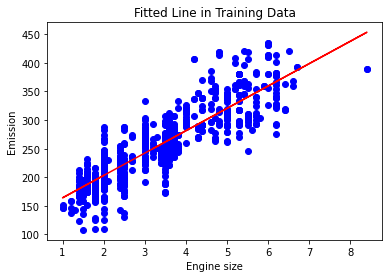

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

Text(0.5, 1.0, 'Fitted Line in Training Data')

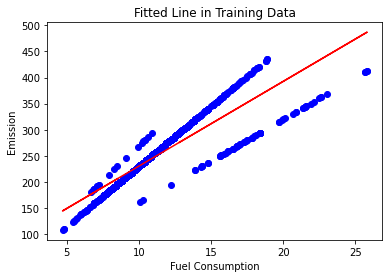

In [30]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

Text(0.5, 1.0, 'Fitted Line in Training Data')

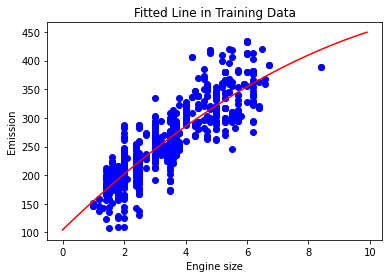

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

Text(0.5, 1.0, 'Fitted Line in Training Data')

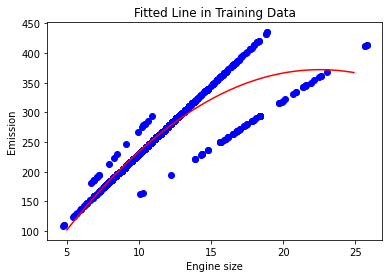

In [28]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
XX = np.arange(5.0, 25.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

<a name='4'></a>
## 4.2 Test

In [21]:
from sklearn.metrics import r2_score

test_y1_ = regr1.predict(test_x1)
test_y2_ = regr2.predict(test_x2)

In [50]:
from sklearn.metrics import r2_score

test_x1_poly = poly.fit_transform(test_x1)
test_y1_poly = clf1.predict(test_x_poly)

test_x2_poly = poly.fit_transform(test_x2)
test_y2_poly = clf2.predict(test_x_poly)

<a name='5'></a>
# 5. Model Evaluation

Mean absolute error: 22.66
Residual sum of squares (MSE): 892.27
R2-score: 0.79


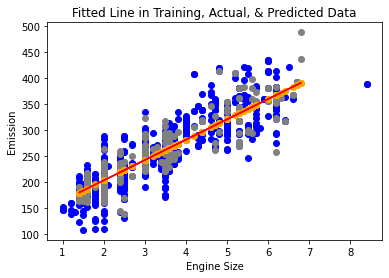

In [32]:
plt.scatter(train_x1, train_y1,  color='blue')
plt.scatter(test_x1, test_y1,  color='grey')
plt.scatter(test_x1, test_y1_,  color='orange')
plt.plot(test_x1, regr1.coef_[0][0]*test_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_ - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1 , test_y1_) )

Mean absolute error: 20.74
Residual sum of squares (MSE): 871.64
R2-score: 0.80


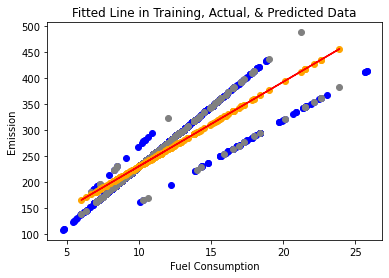

In [33]:
plt.scatter(train_x2, train_y2,  color='blue')
plt.scatter(test_x2, test_y2,  color='grey')
plt.scatter(test_x2, test_y2_,  color='orange')
plt.plot(test_x2, regr2.coef_[0][0]*test_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.title("Fitted Line in Training, Actual, & Predicted Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_ - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_ - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2 , test_y2_) )

Mean absolute error: 194.70
Residual sum of squares (MSE): 40204.76
R2-score: -33.94


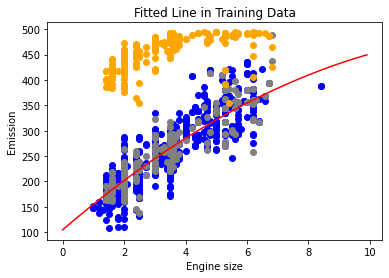

In [51]:
plt.scatter(train_x1, train_y1,  color='blue')
plt.scatter(test_x1, test_y1,  color='grey')
plt.scatter(test_x1, test_y1_poly,  color='orange')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_poly - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_poly - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y1_poly , test_y1) )

Mean absolute error: 13.67
Residual sum of squares (MSE): 622.38
R2-score: 0.81


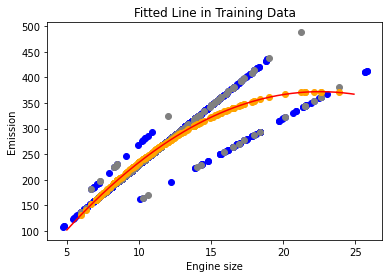

In [47]:
plt.scatter(train_x2, train_y2,  color='blue')
plt.scatter(test_x2, test_y2,  color='grey')
plt.scatter(test_x2, test_y2_poly,  color='orange')
XX = np.arange(5.0, 25.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Fitted Line in Training Data")

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2_poly - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2_poly - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2_poly , test_y2) )